In [19]:
import os
from IPython.display import clear_output
from PIL import Image
import numpy as np

# Function to apply bicubic interpolation with anti-aliasing
def apply_bicubic_interpolation(input_folder, output_folder, scale_factor):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.JPEG', '.bmp', '.gif')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)
            
            # Calculate new size
            new_size = (int(img.width * scale_factor), int(img.height * scale_factor))
            
            # Apply bicubic interpolation with anti-aliasing
            img_resized = img.resize(new_size, Image.BICUBIC)
            
            # Save the processed image
            output_path = os.path.join(output_folder, filename)
            img_resized.save(output_path)

# Example usage
input_folder = 'more_images/500steps'
output_folder = 'small_50'
scale_factor = 0.25  # Example scale factor

apply_bicubic_interpolation(input_folder, output_folder, scale_factor)
def add_black_borders(img, target_size=(128, 192)):
    # Create a new image with the target size and black background
    new_img = Image.new("RGB", target_size, (0, 0, 0))
    
    # Calculate the position to paste the original image
    paste_position = ((target_size[0] - img.width) // 2, (target_size[1] - img.height) // 2)
    
    # Paste the original image onto the new image
    new_img.paste(img, paste_position)
    
    return new_img

# Apply black borders to all images in the output folder
for filename in os.listdir(output_folder):
    if filename.endswith(('.png', '.jpg', '.JPEG', '.bmp', '.gif')):
        img_path = os.path.join(output_folder, filename)
        img = Image.open(img_path)
        
        # Add black borders
        img_with_borders = add_black_borders(img)
        
        # Save the processed image
        img_with_borders.save(img_path)

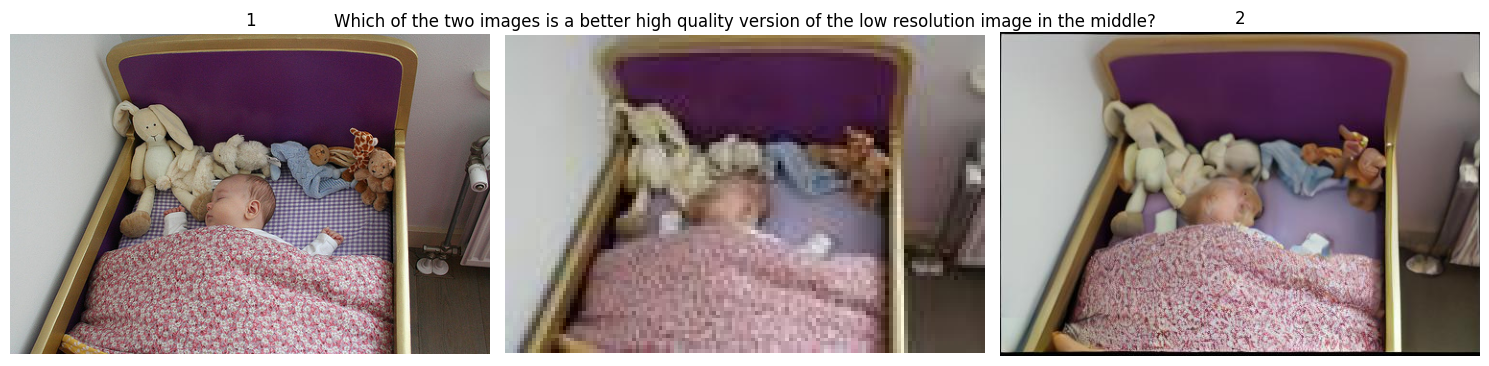

KeyboardInterrupt: 

In [10]:
import random
def remove_black_bars(img, threshold=0.99):
    # Convert image to numpy array
    img_array = np.array(img)
    
    dark_threshold = 10
    dark_pixels = np.all(img_array < dark_threshold, axis=2)
    
    # Calculate the threshold for dark pixels
    dark_pixel_threshold = int(threshold * img_array.shape[1])
    
    # Find all rows and columns that are not mostly dark
    non_dark_rows = np.sum(dark_pixels, axis=1) < dark_pixel_threshold
    non_dark_cols = np.sum(dark_pixels, axis=0) < dark_pixel_threshold
    
    # Crop the image to remove dark borders
    cropped_img_array = img_array[non_dark_rows][:, non_dark_cols]
    
    # Convert back to PIL image
    cropped_img = Image.fromarray(cropped_img_array)
    
    return cropped_img

# List the file names in the output directory
file_names = os.listdir(output_folder)
print(file_names)

output_folder = 'outmages/take2'
upscaled_folder = "upscaled"

import matplotlib.pyplot as plt

# Display images side-by-side
fig, axes = plt.subplots(len(file_names), 3, figsize=(15, 5 * len(file_names)))

for i, filename in enumerate(file_names):
    original_img = Image.open(os.path.join(input_folder, filename))
    resized_img = Image.open(os.path.join(output_folder, filename))
    upscaled_img = Image.open(os.path.join(upscaled_folder, filename))

    upscaled_img = remove_black_bars(upscaled_img)
    resized_img = remove_black_bars(resized_img)
 
    axes[i, 0].set_title('1')
    axes[i, 2].set_title('2')

    # Randomly decide the position of original and upscaled images
    if random.choice([True, False]):
        axes[i, 0].imshow(original_img)
        # 
        axes[i, 2].imshow(upscaled_img)
        # axes[i, 2].set_title('Upscaled')
    else:
        axes[i, 0].imshow(upscaled_img)
        # axes[i, 0].set_title('Upscaled')
        axes[i, 2].imshow(original_img)
        # axes[i, 2].set_title('Original')
    
    axes[i, 0].axis('off')
    axes[i, 2].axis('off')
 
    # Remove black bars from the resized image
    # cropped_img = remove_black_bars()
    
    axes[i, 1].imshow(resized_img)
    axes[i, 1].set_title('Which of the two images is a better high quality version of the low resolution image in the middle?')
    axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()
    clear_output(wait=True)

In [25]:
import random
import time

answer_key = []

# List the file names in the output directory

input_folder = 'more_images/500steps'
output_folder = 'small_500'
upscaled_folder = "upscaled_500"

file_names = os.listdir(input_folder)
print(file_names)

# Display images side-by-side

for i, filename in enumerate(file_names):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    original_img = Image.open(os.path.join(input_folder, filename))
    resized_img = Image.open(os.path.join(output_folder, filename))
    upscaled_img = Image.open(os.path.join(upscaled_folder, filename))

    upscaled_img = remove_black_bars(upscaled_img)
    resized_img = remove_black_bars(resized_img)

    axes[0].set_title('1')
    axes[2].set_title('2')

    # Randomly decide the position of original and upscaled images
    if random.choice([True, False]):
        axes[0].imshow(original_img)
        # 
        axes[2].imshow(upscaled_img)
        # axes[i, 2].set_title('Upscaled')
        answer_key.append(1)
    else:
        axes[0].imshow(upscaled_img)
        # axes[i, 0].set_title('Upscaled')
        axes[2].imshow(original_img)
        # axes[i, 2].set_title('Original')
        answer_key.append(2)

    axes[0].axis('off')
    axes[2].axis('off')

    # Remove black bars from the resized image
    # cropped_img = remove_black_bars()

    axes[1].imshow(resized_img)
    axes[1].set_title('Which of the two images is a better high quality version of the low resolution image in the middle?')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
    time.sleep(3)
    clear_output(wait=True)


clear_output(wait=True)

print("Answer key:")
print(answer_key)

Answer key:
[2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1]


Experiment 1: 100 Steps
1: 1, 1, 1, 1
1: 1, 1, 1, 1
2: 2, 2, 2, 2
2: 2, 2, 2, 2
2: 2, 2, 2, 2
1: 1, 1, 1, 1
1: 1, 1, 1, 1
1: 1, 1, 1, 2
1: 1, 1, 1, 1
1: 1, 1, 1, 1
2: 1, 2, 2, 2
1: 1, 1, 1, 1
2: 2, 2, 2, 2
2: 2, 2, 1, 2
2: 2, 2, 2, 2
1: 1, 1, 1, 1
2: 2, 1, 2, 1
1: 1, 1, 1, 1
2: 2, 2, 2, 2
1: 1, 1, 1, 1

Model Points: 1 + 1 + 1 + 2 = 5
Original Points: 4 + 4 + 4 + 4 + 4 + 4 + 4 + 3 + 4 + 4 + 3 + 4 + 4 + 3 + 4 + 4 + 2 + 4 + 4 + 4 = 75


Experiment 2: 50 Steps
1: 1111
1: 1111
1: 1111
2: 2222
2: 2122
1: 1111
2: 2222
1: 1111
2: 2222
1: 1111
2: 2212
2: 2222
2: 2222
2: 2222
2: 2112
1: 2112
1: 1111
1: 1111
2: 2222
1: 1211

Model Points: 1 + 2 + 2 + 1 = 6
Original Points: 4 + 4 + 4 + 4 + .. = 74

Experiment 3: 500 Steps
2: 2212
1: 1111
2: 2222
1: 1111
2: 2222
2: 2211
2: 2222
1: 1112
2: 2212
1: 1111
1: 1111
1: 1112
1: 1111
1: 1111
2: 2212
2: 2112
2: 2212
2: 2222
1: 1111
1: 1112

Model Points: 1 + 2 + 1 +1 + 1 + 1 + 2 + 1 + 1 = 11
Original Points: = 69

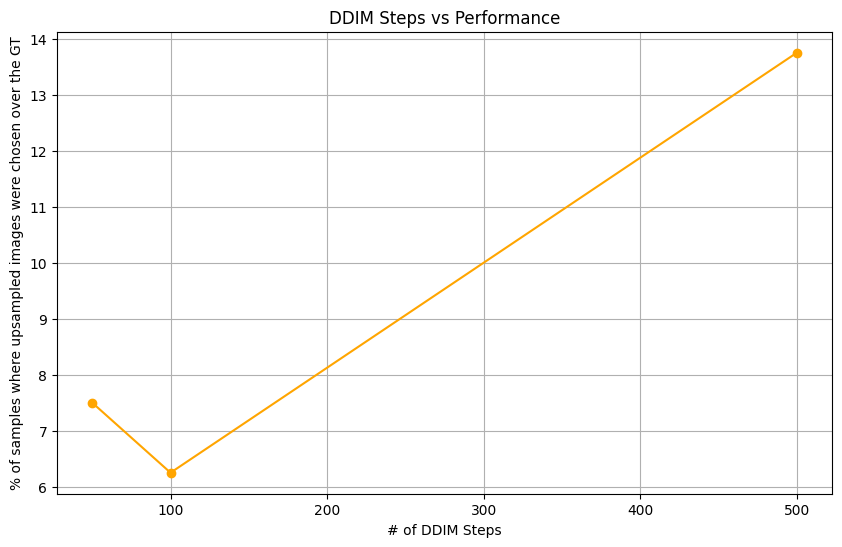

In [1]:
import matplotlib.pyplot as plt

# Data points
steps = [50, 100, 500]
values = [7.5, 6.25, 13.75]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(steps, values, marker='o', linestyle='-', color='orange')

# Add titles and labels
plt.title('DDIM Steps vs Performance')
plt.xlabel('# of DDIM Steps')
plt.ylabel('% of samples where upsampled images were chosen over the GT')

# Show the graph
plt.grid(True)
plt.show()